<a href="https://colab.research.google.com/github/ev1025/CP1/blob/main/Code_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인스타카트 데이터 분석

참고자료 : 케글 인스타카트 장바구니 분석 데이터     
https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis

# 1. CRISP-DM 기반 분석

## 1) 비즈니스이해

## 2) 데이터 이해

## 3) 데이터 전처리

In [ ]:
# 한글 그래프 폰트(런타임재시작, plt.rc('font', family='NanumBarunGothic'))
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from functools import reduce

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/인스타카트/aisles.csv')               # 소분류
df2 = pd.read_csv('/content/drive/MyDrive/인스타카트/departments.csv')          # 대분류
df3 = pd.read_csv('/content/drive/MyDrive/인스타카트/order_products__prior.csv')
df4 = pd.read_csv('/content/drive/MyDrive/인스타카트/orders.csv')
df5 = pd.read_csv('/content/drive/MyDrive/인스타카트/products.csv')

In [ ]:
df3.shape

(32434489, 4)

In [ ]:
df1.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [ ]:
df2.isnull().sum()

department_id    0
department       0
dtype: int64

In [ ]:
df3.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [ ]:
df4.isnull().sum()# 현재 주문 이전 주문과의 텀(데이터 유지)

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [ ]:
df5.isnull().sum() 

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [ ]:
# 한 번에 merge 각 컬럼이 달라서 실패
# data = [df3,df1,df2,df5,df6]
# full_data = reduce(lambda x,y : pd.merge(x,y), data)

In [ ]:
# 데이터 합치는 함수
def df_merge(t1,t2,t3,t4,t5):
    data = pd.merge(t1,t2)
    data = pd.merge(data,t3)
    data = pd.merge(data,t4)
    data = pd.merge(data,t5)
    return data

In [ ]:
full_data = df_merge(df3,df4,df5,df1,df2)
full_data

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,153404,prior,2,0,16,7.0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,23750,prior,11,6,8,10.0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,58707,prior,21,6,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,166654,prior,48,0,12,9.0,Organic Egg Whites,86,16,eggs,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,2882701,21581,8,0,174096,prior,11,3,9,3.0,Doc McStuffins Adhesive Bandages,6,2,other,other
32434485,2909991,18001,5,0,80613,prior,10,0,11,2.0,Dried Porcini Mushroom,6,2,other,other
32434486,3016581,46404,1,1,132609,prior,8,5,14,2.0,Cotes De Provence Rose,6,2,other,other
32434487,3326955,46404,1,0,132609,prior,7,3,15,2.0,Cotes De Provence Rose,6,2,other,other


In [ ]:
# 그래프분석에 사용할 데이터 만들기
df_graph = full_data[['user_id','product_name','aisle','department','order_number','reordered','order_dow','days_since_prior_order']]

In [ ]:
# 컬럼명 변경
def df_rename(data):
    data.columns = ['유저','제품','소분류','대분류','누적주문','재주문','요일','주문텀']
    return data

In [ ]:
df_graph = df_rename(df_graph)
df_graph

,유저,제품,소분류,대분류,누적주문,재주문,요일,주문텀
0,202279,Organic Egg Whites,eggs,dairy eggs,3,1,5,8.0
1,153404,Organic Egg Whites,eggs,dairy eggs,2,0,0,7.0
2,23750,Organic Egg Whites,eggs,dairy eggs,11,0,6,10.0
3,58707,Organic Egg Whites,eggs,dairy eggs,21,1,6,8.0
4,166654,Organic Egg Whites,eggs,dairy eggs,48,1,0,9.0
...,...,...,...,...,...,...,...,...
32434484,174096,Doc McStuffins Adhesive Bandages,other,other,11,0,3,3.0
32434485,80613,Dried Porcini Mushroom,other,other,10,0,0,2.0
32434486,132609,Cotes De Provence Rose,other,other,8,1,5,2.0
32434487,132609,Cotes De Provence Rose,other,other,7,0,3,2.0


In [176]:
df_graph.groupby('제품')['주문텀'].max().sort_values(ascending=False).dropna()

제품
#2 Coffee Filters                                            30.0
Organic Super Tampons Wth Applicator                         30.0
Organic Superfood Blend Protein Smoothie Mix                 30.0
Organic Superfood Coconut Flour Gluten-Free                  30.0
Organic Superfood Oat Based Espresso Maca Mulberry Cereal    30.0
                                                             ... 
Pomegranate Energy Shot                                       1.0
Organic Veggie Ground                                         0.0
Blackened Turkey                                              0.0
Organic Chocolate Mint Caffeine Free Tea                      0.0
Amaretto Almond Crunch Ice Cream                              0.0
Name: 주문텀, Length: 49646, dtype: float64

In [ ]:
# CSV로 저장
# df_graph.to_csv('file.csv',index=False)

In [ ]:
# 대분류 순위
df_graph['대분류'].value_counts(normalize=True)

produce            0.292260
dairy eggs         0.166922
snacks             0.089027
beverages          0.082940
frozen             0.068952
pantry             0.057827
bakery             0.036282
canned goods       0.032930
deli               0.032411
dry goods pasta    0.026719
household          0.022774
breakfast          0.021877
meat seafood       0.021857
personal care      0.013785
babies             0.013066
international      0.008301
alcohol            0.004739
pets               0.003013
missing            0.002132
other              0.001119
bulk               0.001066
Name: 대분류, dtype: float64

In [ ]:
count_depart = df_graph['대분류'].value_counts()
count_depart = count_depart.to_frame()
count_depart.reset_index(inplace=True)
count_depart.columns = ['대분류','개수']

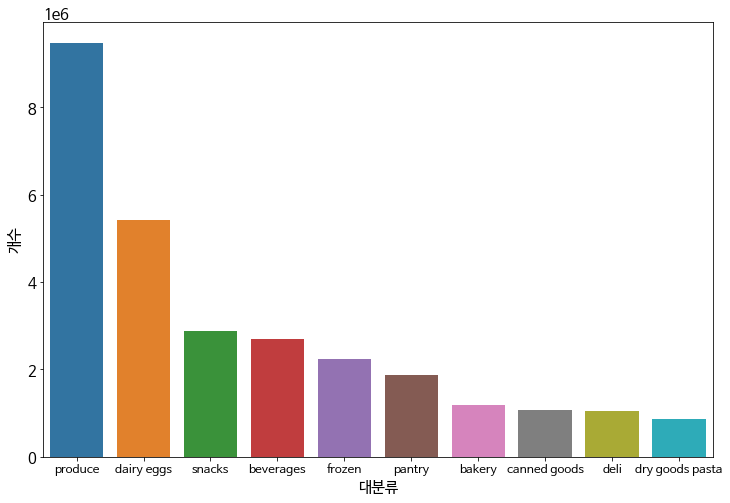

In [154]:
plt.rc('font', size= 15, family='NanumBarunGothic')
plt.rc('xtick',labelsize=12)

plt.figure(figsize =(12,8))
sns.barplot(data=count_depart[:10],x='대분류',y='개수')

plt.show()

In [ ]:
# 대분류 produce의 제품목록
df_graph[df_graph['대분류']=='produce']['제품'].value_counts()

Banana                                472565
Bag of Organic Bananas                379450
Organic Strawberries                  264683
Organic Baby Spinach                  241921
Organic Hass Avocado                  213584
                                       ...  
Yellow Cherry Tomato                       3
Organic Velvet Pioppini Mushrooms          3
Graffiti Eggplant                          2
Baby Beets                                 2
Organic Honey Bunch Grape Tomatoes         2
Name: 제품, Length: 1684, dtype: int64

In [172]:
df_graph.groupby(['요일','대분류'])['유저'].count().loc[0]

대분류
alcohol              17437
babies               81622
bakery              225382
beverages           433110
breakfast           127162
bulk                  6137
canned goods        228161
dairy eggs         1020167
deli                209526
dry goods pasta     182149
frozen              439144
household           126237
international        55728
meat seafood        151417
missing              13220
other                 6086
pantry              351950
personal care        80387
pets                 17151
produce            1953784
snacks              483709
Name: 유저, dtype: int64

In [ ]:
product_count = df_graph['제품'].value_counts()
product_count

Banana                                        472565
Bag of Organic Bananas                        379450
Organic Strawberries                          264683
Organic Baby Spinach                          241921
Organic Hass Avocado                          213584
                                               ...  
Salsa, Black Bean                                  1
Lndbrg White Quinoa 16 Z                           1
Aged Parmesan Cheese Sticks                        1
Pasta & Enchilada Sauce, Organic, 7 Veggie         1
Homestlye Cornbread Stuffing                       1
Name: 제품, Length: 49677, dtype: int64

In [ ]:
top_5 = product_count[:5].to_frame().reset_index()

In [ ]:
top_5.rename(columns={'index':'제품명'},inplace=True)

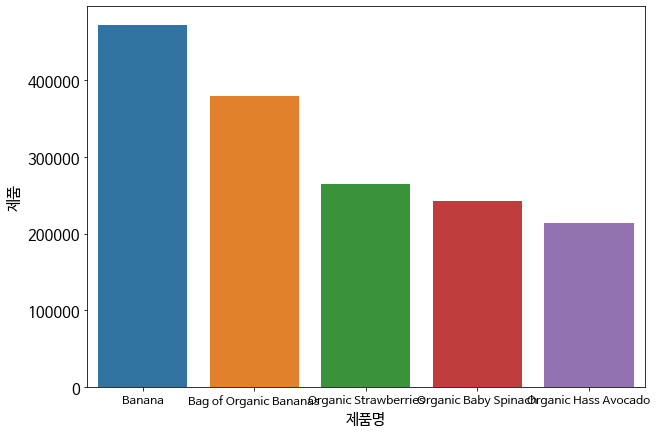

In [156]:
plt.figure(figsize=(10,7))
sns.barplot(data = top_5, x='제품명',y='제품')
plt.show()

In [127]:
# 재주문이 많은 제품 top20
df_graph.groupby('제품')['재주문'].sum().sort_values(ascending=False).head(20)

제품
Banana                      398609
Bag of Organic Bananas      315913
Organic Strawberries        205845
Organic Baby Spinach        186884
Organic Hass Avocado        170131
Organic Avocado             134044
Organic Whole Milk          114510
Large Lemon                 106255
Organic Raspberries         105409
Strawberries                 99802
Limes                        95768
Organic Yellow Onion         79072
Organic Garlic               74663
Organic Zucchini             72165
Cucumber Kirby               67313
Organic Fuji Apple           63811
Organic Blueberries          62922
Apple Honeycrisp Organic     62510
Organic Lemon                60536
Organic Half & Half          59672
Name: 재주문, dtype: int64

In [ ]:
df_graph['소분류'].value_counts(normalize=True)

fresh fruits                  0.112294
fresh vegetables              0.105382
packaged vegetables fruits    0.054427
yogurt                        0.044778
packaged cheese               0.030207
                                ...   
eye ear care                  0.000277
baby bath body care           0.000265
baby accessories              0.000252
beauty                        0.000190
frozen juice                  0.000150
Name: 소분류, Length: 134, dtype: float64

In [ ]:
df_days = df_graph.groupby('요일')['유저'].count()
df_days = df_days.to_frame()
df_days.reset_index(inplace=True)
df_days

,요일,유저
0,0,6209666
1,1,5665856
2,2,4217798
3,3,3844117
4,4,3787215
5,5,4209533
6,6,4500304


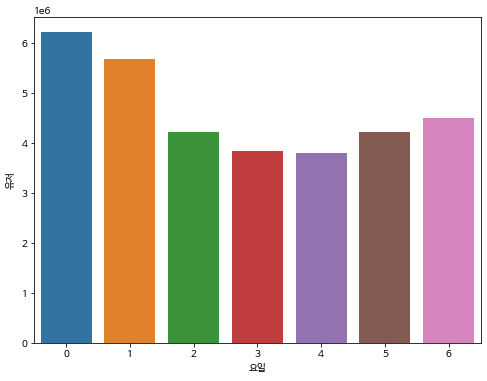

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data = df_days, x=df_days['요일'],y= df_days['유저'] )

In [ ]:
day_depart = df_graph.groupby('요일')['대분류'].value_counts()
day_depart = day_depart.to_frame()
day_depart

In [104]:
day_depart.loc[0]

,대분류
대분류,
produce,1953784
dairy eggs,1020167
snacks,483709
frozen,439144
beverages,433110
pantry,351950
canned goods,228161
bakery,225382
deli,209526


In [106]:
day_aisles = df_graph.groupby('요일')['소분류'].value_counts()
day_aisles = day_aisles.to_frame()
day_aisles

소분류
요일 소분류                               
0  fresh vegetables            745644
   fresh fruits                715567
   packaged vegetables fruits  370219
   yogurt                      273223
   packaged cheese             194812
...                               ...
6  kitchen supplies              1336
   baby bath body care           1146
   baby accessories              1117
   beauty                         992
   frozen juice                   672

[938 rows x 1 columns]

In [123]:
day_aisles.loc[1]

,소분류
소분류,
fresh fruits,667616
fresh vegetables,590276
packaged vegetables fruits,313143
yogurt,269486
packaged cheese,169398
...,...
baby accessories,1370
kitchen supplies,1326
specialty wines champagnes,1231


## 4) 모델링

k-means

In [188]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df_model = df_graph[['누적주문','주문텀']].dropna()
scaler = MinMaxScaler()
sc_data = scaler.fit_transform(df_model)

In [ ]:
model = KMeans(n_clusters=10, random_state=12)
model.fit(sc_data)

## 5) 평가

## 6) 배포